In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

database = 'database.sqlite'

In [49]:
conn = sqlite3.connect(database)

# Display all Tables in database

In [50]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [24]:
countires = pd.read_sql("""SELECT * FROM Country;""",conn)
countires

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


# List of Players

In [48]:
players = pd.read_sql("""SELECT * FROM Player
                            WHERE birthday > 1990 
                            AND weighT < 130
                            ORDER BY height ASC;""",conn)
players

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,3446,215412,Fouad Rachid,201504,1991-11-15 00:00:00,162.56,126
1,317,664961,Aldo Kalulu,230079,1996-01-21 00:00:00,165.10,126
2,1480,163840,Caetano,199931,1991-04-20 00:00:00,165.10,123
3,7264,210118,Maxime Blanc,210277,1992-01-23 00:00:00,165.10,126
4,10954,108461,Yohandry Orozco,202559,1991-03-19 00:00:00,165.10,121
5,655,605507,Andre Horta,226370,1996-11-07 00:00:00,167.64,126
6,4316,173448,Ibrahim Rabiu,197359,1991-03-15 00:00:00,167.64,128
7,8357,527549,Patrick Roberts,221982,1997-02-05 00:00:00,167.64,128
8,10646,574633,Vincent Koziello,225199,1995-10-28 00:00:00,167.64,128
9,10238,468931,Thomas Lemar,213565,1995-11-12 00:00:00,170.18,128


# List of Leagues

In [37]:
leagues = pd.read_sql("""SELECT * 
                        FROM League 
                        JOIN Country on Country.id = League.country_id
                        ORDER BY name DESC;""", conn)
leagues

,id,country_id,name,id,name
0,24558,24558,Switzerland Super League,24558,Switzerland
1,21518,21518,Spain LIGA BBVA,21518,Spain
2,19694,19694,Scotland Premier League,19694,Scotland
3,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
4,15722,15722,Poland Ekstraklasa,15722,Poland
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,10257,10257,Italy Serie A,10257,Italy
7,7809,7809,Germany 1. Bundesliga,7809,Germany
8,4769,4769,France Ligue 1,4769,France
9,1729,1729,England Premier League,1729,England


# List of Teams

In [33]:
teams = pd.read_sql("""SELECT *
                        FROM Team""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [30]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", conn)
teams

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


# List of Matches

In [98]:
matches = pd.read_sql("""SELECT Match.id,
                            Country.name AS country_name,
                            League.name AS league_name,
                            season,
                            date,
                            HT.team_long_name AS  home_team,
                            AT.team_long_name AS away_team,
                            home_team_goal, 
                            away_team_goal 
                        FROM Match
                        JOIN Country on Country.id = Match.country_id
                        JOIN League on League.id = Match.league_id
                        LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                        LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                        WHERE country_name ='Poland' 
                            AND (away_team LIKE '%Lech %' AND away_team_goal > home_team_goal) 
                            OR (home_team LIKE '%Lech %' AND home_team_goal > away_team_goal)
                        ORDER BY date
                        LIMIT 10
                        ;
                        """, conn)
matches

,id,country_name,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal
0,15814,Poland,Poland Ekstraklasa,2008/2009,2008-08-17 00:00:00,Jagiellonia Białystok,Lech Poznań,0,3
1,15903,Poland,Poland Ekstraklasa,2008/2009,2008-08-23 00:00:00,Lech Poznań,Polonia Bytom,3,0
2,15923,Poland,Poland Ekstraklasa,2008/2009,2008-09-14 00:00:00,Wisła Kraków,Lech Poznań,1,4
3,15933,Poland,Poland Ekstraklasa,2008/2009,2008-09-21 00:00:00,Lech Poznań,Piast Gliwice,1,0
4,15943,Poland,Poland Ekstraklasa,2008/2009,2008-09-28 00:00:00,Widzew Łódź,Lech Poznań,0,3
5,15745,Poland,Poland Ekstraklasa,2008/2009,2008-10-31 00:00:00,Lech Poznań,Odra Wodzisław,3,1
6,15752,Poland,Poland Ekstraklasa,2008/2009,2008-11-09 00:00:00,Lechia Gdańsk,Lech Poznań,0,3
7,15766,Poland,Poland Ekstraklasa,2008/2009,2008-11-16 00:00:00,Lech Poznań,P. Warszawa,2,0
8,15775,Poland,Poland Ekstraklasa,2008/2009,2008-11-22 00:00:00,Cracovia,Lech Poznań,0,1
9,15784,Poland,Poland Ekstraklasa,2008/2009,2008-11-30 00:00:00,Odra Wodzisław,Lech Poznań,0,1


# Basic Analysis

In [102]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Poland', 'Germany')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,Germany,Germany 1. Bundesliga,2015/2016,34,18,1.565359,1.264706,0.300654,2.830065,866
1,Germany,Germany 1. Bundesliga,2014/2015,34,18,1.588235,1.166667,0.421569,2.754902,843
2,Germany,Germany 1. Bundesliga,2013/2014,34,18,1.748366,1.411765,0.336601,3.160131,967
3,Germany,Germany 1. Bundesliga,2012/2013,34,18,1.591503,1.343137,0.248366,2.934641,898
4,Germany,Germany 1. Bundesliga,2011/2012,34,18,1.660131,1.199346,0.460784,2.859477,875
5,Germany,Germany 1. Bundesliga,2010/2011,34,18,1.647059,1.274510,0.372549,2.921569,894
6,Germany,Germany 1. Bundesliga,2009/2010,34,18,1.513072,1.316993,0.196078,2.830065,866
7,Germany,Germany 1. Bundesliga,2008/2009,34,18,1.699346,1.222222,0.477124,2.921569,894
8,Poland,Poland Ekstraklasa,2015/2016,30,16,1.420833,1.225000,0.195833,2.645833,635
9,Poland,Poland Ekstraklasa,2014/2015,30,16,1.516667,1.100000,0.416667,2.616667,628


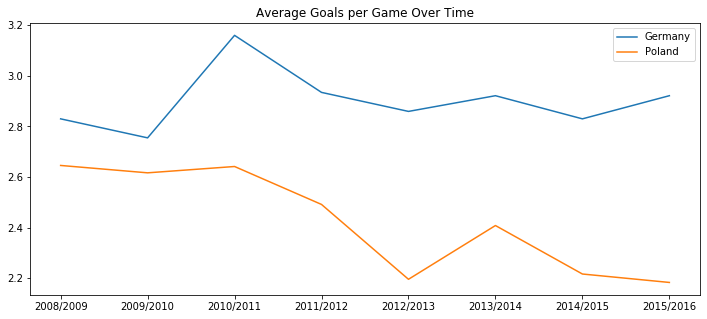

In [105]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Poland']   = list(leages_by_season.loc[leages_by_season['country_name']=='Poland','avg_goals'])


df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

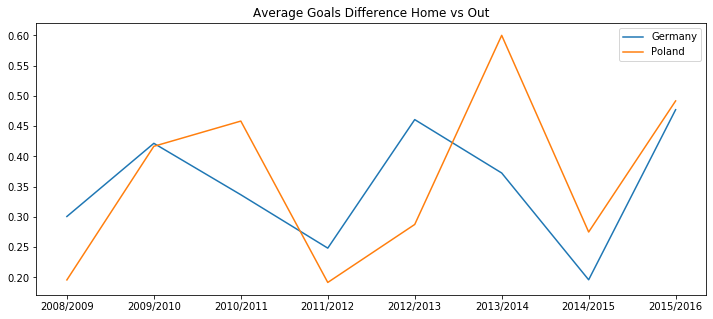

In [107]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Poland']   = list(leages_by_season.loc[leages_by_season['country_name']=='Poland','avg_goal_dif'])
df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

# Sub Queries and Functions

In [110]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161
